###### import matplotlib.pyplot as plt  
import numpy as np
import struct
import sklearn.neighbors as nb
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline




def PCA(data,dimensions):
    '''
    data is the original data set，rows are samples of data,columns are the features
    '''

    # making data zero-means
    average = np.mean(data,0)
    data_zero = np.mat(data-average)
    
    #covariance
    covariance = np.cov(data_zero,rowvar=False)
    
    #eigenvalues
    eig_var,eig_vec = np.linalg.eig(covariance)
    
    
    #from the numpy doc, the eig_var may not be ordered.
    sort_eig = np.argsort(-eig_var)
    #return the index that make a sorted array

    #so we got the sorted eig_var
    sort_eig = sort_eig[:dimensions]
    principal_vec = np.mat(eig_vec[:,sort_eig])
    
   
    low_data = data_zero * principal_vec
    
    return low_data

In [9]:
def SVD(data,dimensions):
    '''
    data is the original data set，rows are samples of data,columns are the features
    '''

    # making data zero-means
    average = np.mean(data,0)
    data_zero = data-average
    
    #covariance
    covariance = np.cov(data_zero,rowvar=False)
    
    u,s,v = np.linalg.svd(data)
    #s is sorted in descending order.
    principal_vec = v.T[:,:dimensions]
    low_data = np.mat(data_zero) * np.mat(principal_vec)
    
    return low_data


>the data format  

    TRAINING SET IMAGE FILE (train-images-idx3-ubyte):

    [offset] [type]          [value]          [description] 
    0000     32 bit integer  0x00000803(2051) magic number 
    0004     32 bit integer  60000            number of images 
    0008     32 bit integer  28               number of rows 
    0012     32 bit integer  28               number of columns 
    0016     unsigned byte   ??               pixel 
    0017     unsigned byte   ??               pixel 
    ........ 
    xxxx     unsigned byte   ??               pixel
    Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).
    
>so there are 4*32 bits we shuold take care of. And the rest is actually what we want

## the first 2K training images

In [10]:
def load_training_data(num):    
    original_data_file = open('train-images',"rb")
    label_file = open('train-labels',"rb")
    data_buff = original_data_file.read()
    label_buff = label_file.read()

    data_index = 0
    label_index = 0

    # read the magic, image numbers, rows, columns
    magicD, numImages , numRows , numColumns = struct.unpack_from('>IIII' , data_buff , data_index)
    data_index += struct.calcsize('>IIII')

    magicL, numLabels = struct.unpack_from('>II' , label_buff , label_index)    
    label_index += struct.calcsize('>II') 


    data = np.zeros((num,28*28))
    labels = []

    for i in range(num):
        # read data
        im = struct.unpack_from('>784B',data_buff, data_index)
        data_index += struct.calcsize('>784B')
        im = np.array(im)
        data[i]=im

        #read labels
        la = struct.unpack_from('>1B',label_buff, label_index)   
        label = la[0] 
        label_index += struct.calcsize('>1B')  
        labels.append(label)  
    return data, labels

In [ ]:
data, labels = load_training_data(2000)

low_data = PCA(data,5)

fig = plt.figure()
plotwindow = fig.add_subplot(111)
a = np.array(low_data)

# draw the scatters
color = ['yellowgreen','yellow','chartreuse','turquoise','orange','coral','salmon','darkgray','skyblue','mediumpurple']
for j in range(len(low_data)):
    
    plt.scatter(a[j][0],a[j][1],c=color[labels[j]],s=10)

plt.show()

In [12]:
data, labels = load_training_data(2000)

for i in range(2,22):
    low_data = PCA(data,i)
    knn = nb.KNeighborsClassifier(n_neighbors = 1)  
    knn.fit(low_data[:1000], labels[:1000])
    s = knn.score(low_data[1000:2000], labels[1000:2000])
    print("features",i)
    print("KNN score",s)


/Users/killandy/Library/Python/3.6/lib/python/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


features 2
KNN score 0.385
features 3
KNN score 0.436
features 4
KNN score 0.535
features 5
KNN score 0.622
features 6
KNN score 0.725
features 7
KNN score 0.758
features 8
KNN score 0.793
features 9
KNN score 0.816
features 10
KNN score 0.82
features 11
KNN score 0.816
features 12
KNN score 0.853
features 13
KNN score 0.858
features 14
KNN score 0.855
features 15
KNN score 0.872
features 16
KNN score 0.886
features 17
KNN score 0.879
features 18
KNN score 0.881
features 19
KNN score 0.875
features 20
KNN score 0.876
features 21
KNN score 0.88


## the first 2K test images

In [7]:
def load_testing_data(num):
    original_data_file = open('t10k-images',"rb")
    label_file = open('t10k-labels',"rb")
    data_buff = original_data_file.read()
    label_buff = label_file.read()

    data_index = 0
    label_index = 0

    # read the magic, image numbers, rows, columns
    magicD, numImages , numRows , numColumns = struct.unpack_from('>IIII' , data_buff , data_index)
    data_index += struct.calcsize('>IIII')

    magicL, numLabels = struct.unpack_from('>II' , label_buff , label_index)    
    label_index += struct.calcsize('>II') 


    data = np.zeros((num,28*28))
    labels = []

    for i in range(num):
        # read data
        im = struct.unpack_from('>784B',data_buff, data_index)
        data_index += struct.calcsize('>784B')
        im = np.array(im)
        data[i]=im

        #read labels
        la = struct.unpack_from('>1B',label_buff, label_index)   
        label = la[0] 
        label_index += struct.calcsize('>1B')  
        labels.append(label)  

    return data, labels



In [ ]:
data, labels = load_testing_data(2000)     
low_data = PCA(data,5)

fig = plt.figure()
plotwindow = fig.add_subplot(111)
a = np.array(low_data)

# draw the scatters
color = ['yellowgreen','yellow','chartreuse','turquoise','orange','coral','salmon','darkgray','skyblue','mediumpurple']
for j in range(len(low_data)):
    
    plt.scatter(a[j][0],a[j][1],c=color[labels[j]],s=10)

plt.show()

## the first 2K training 3D

/Users/killandy/Library/Python/3.6/lib/python/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/killandy/Library/Python/3.6/lib/python/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


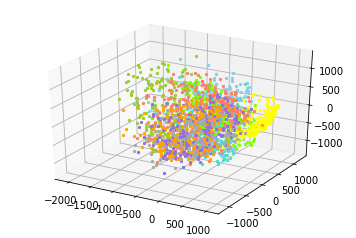

In [8]:
original_data_file = open('train-images',"rb")
label_file = open('train-labels',"rb")
data_buff = original_data_file.read()
label_buff = label_file.read()

data_index = 0
label_index = 0

# read the magic, image numbers, rows, columns
magicD, numImages , numRows , numColumns = struct.unpack_from('>IIII' , data_buff , data_index)
data_index += struct.calcsize('>IIII')

magicL, numLabels = struct.unpack_from('>II' , label_buff , label_index)    
label_index += struct.calcsize('>II') 


data = np.zeros((2000,28*28))
labels = []

for i in range(2000):
    # read data
    im = struct.unpack_from('>784B',data_buff, data_index)
    data_index += struct.calcsize('>784B')
    im = np.array(im)
    data[i]=im
    
    #read labels
    la = struct.unpack_from('>1B',label_buff, label_index)   
    label = la[0] 
    label_index += struct.calcsize('>1B')  
    labels.append(label)  
    
low_data = PCA(data,3)
a = np.array(low_data)

ax = plt.figure().add_subplot(111, projection = '3d')  
# draw the scatters

for j in range(len(low_data)): 
    ax.scatter(a[j][0],a[j][1],a[j][2], c=color[labels[j]],s=5) #点为红色三角形  

plt.show()

## Result Analysis

#### Phenomenon
As shown above, the dots with the same color gathered together. But different colors may squeeze in a narrow area. Therefore we can't distinguish different numbers clearly.

#### Analysis
In order to show the results in picture, we reduce the data set to a 2-D. Of cource the data may lose some imformation and features. As a result, it get difficult to discern the numbers.

### Improve
We may extend the dimensions to remain more imformation and features.





